# k-Nearest Neighbor (kNN)

The kNN classifier consists of two stages:
 - During training, the classifier takes the training data and simply remembers it
 - During testing, kNN classifies every test image by comparing to all training images and transfering the labels of the k most similar training examples

The value of k is cross-validated. In this notebook, try to:
 - undestand the basic Image Classification pipeline;
 - perform cross-validation
 - gain proficiency in writing efficient, vectorized code.
 
Platform:
 - Win10 64bit
 - python3.5

## Data Preprocessing 

In [1]:
# Import the esential libs
import numpy as np
import random
import sys
import matplotlib.pyplot as plt

from cs231n.data_utils import load_CIFAR10

In [2]:
# set the matplotlib
%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# optional setting
# Some more magic so that the notebook will reload external python modules;
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
# %load_ext autoreload
# %autoreload 2

In [3]:
# load the CiFAR-10 data
cifar10_dir = 'D:/CS231N_CNN/DataSet/cifar-10-batches-py/'
X_tr, y_tr, X_te, y_te = load_CIFAR10(cifar10_dir)

# As a sanity check, we print out the size of the training and test data
print('Training data shape:   ', X_tr.shape)
print('Training labels shape: ', y_tr.shape)
print('Test data shape:       ', X_te.shape)
print('Test labels shape:     ', y_te.shape)

D:/CS231N_CNN/DataSet/cifar-10-batches-py/data_batch_1
D:/CS231N_CNN/DataSet/cifar-10-batches-py/data_batch_2
D:/CS231N_CNN/DataSet/cifar-10-batches-py/data_batch_3
D:/CS231N_CNN/DataSet/cifar-10-batches-py/data_batch_4
D:/CS231N_CNN/DataSet/cifar-10-batches-py/data_batch_5
Training data shape:    (50000, 3, 32, 32)
Training labels shape:  (50000,)
Test data shape:        (10000, 3, 32, 32)
Test labels shape:      (10000,)


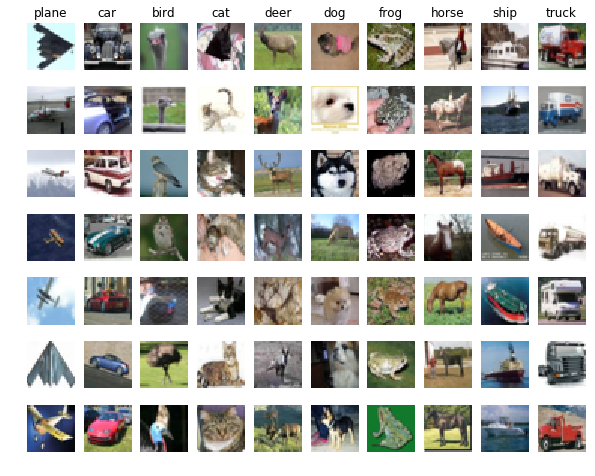

In [4]:
# Visuallize  some examples from the dataset.
# Show a few examples of training images from each class.
classes = ['plane','car','bird','cat','deer','dog','frog','horse','ship','truck']
num_class = len(classes)
samples_per_class = 7
plt.figure()
for y, cls in enumerate(classes):     # for example:y=0, cls='plane'; y=1, cls='car'
    idxs = np.flatnonzero(y_tr == y)  # find the indicies of y_tr==y
    idxs = np.random.choice(idxs, samples_per_class,replace=False)
    for i, idx in enumerate(idxs):
        plt_idx = i * num_class + y + 1
        plt.subplot(samples_per_class, num_class, plt_idx)
        plt.imshow(X_tr[idx].astype('uint8').transpose(1,2,0))
        plt.axis('off')
        if i == 0:
            plt.title(cls)

plt.show()

In [5]:
# Subsample the data for more efficient code excution in this exercise
num_training = 5000
IndSel = range(num_training)
X_train = X_tr[IndSel]
y_train = y_tr[IndSel]

num_test = 2000
IndSel = range(num_test)
X_test = X_te[IndSel]
y_test = y_te[IndSel]

# Reshape the image data into rows
X_train = np.reshape(X_train, (X_train.shape[0], -1))
X_test  = np.reshape(X_test, (X_test.shape[0], -1))
print(X_train.shape, X_test.shape)

(5000, 3072) (2000, 3072)


## KNN classifier
In this section, we will create a KNN classifier instance and use it to classify the given images.

<font color=#FF0000 >**Code Instruction**</font>

in K_NearestNeighbor.py, we define a **KNearestNeighbor class**, which has the property of train() and predict(). The class structure is:

```python
class KNearestNeighbor(object):

    def __init__(self):
        pass
    def train(self,X,y):
        # just remember the training data
    def predict(self, X, k=1, num_loops=0):
       """
       Fisrt, calculate the distance; with double loops; single loop; no loop
       Second, precit labels
       """
    def predict_labels(self, dists, k=1):
       # predict labels according to the distance
```

Here, emember that training a kNN classifier is a noop: the Classifier simply remembers the data and does no further processing. Moreover, in the predict() function, we calculate the **Euclidean distance** between the test point and training point. 

In [6]:
# Create a kNN classifier instance. 

from cs231n.classifiers.K_NearestNeighbor import KNearestNeighbor
classifier = KNearestNeighbor()
classifier.train(X_train, y_train)

We would now like to classify the test data with the kNN classifier. Recall that we can break down this process into two steps:
 - First we must compute the distances between all test examples and all train examples. 
 - Given these distances, for each test example we find the k nearest examples and have them vote for the label

Lets begin with computing the distance matrix between all training and test examples. For example, if there are **Ntr** training examples and **Nte** test examples, this stage should result in a **Nte x Ntr** matrix where each element (i,j) is the distance between the i-th test and j-th train example.

### Compute the Euclidean distance with double loop
Firslt, we will use uses a (very inefficient) double loop over all pairs of (test, train) examples and computes the distance matrix one element at a time.

(2000, 5000)
[[ 3803.92350081  4210.59603857  5504.0544147  ...,  4007.64756434
   4203.28086142  4354.20256764]
 [ 6336.83367306  5270.28006846  4040.63608854 ...,  4829.15334194
   4694.09767687  7768.33347636]
 [ 5224.83913628  4250.64289255  3773.94581307 ...,  3766.81549853
   4464.99921613  6353.57190878]
 ..., 
 [ 7616.02750783  6901.51258783  6357.87527402 ...,  6388.82602674
   4980.93555469  8507.26507169]
 [ 3993.82723712  5242.26525464  6460.24124937 ...,  4786.66804782
   5427.52245504  3556.92507652]
 [ 5514.30149702  4810.31225598  5264.33091665 ...,  4555.73418891
   3338.9529796   6810.04838456]]


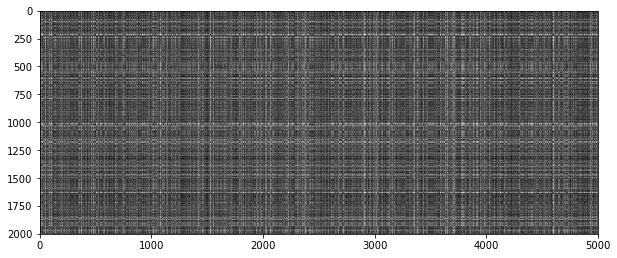

In [7]:
dists = classifier.compute_dis_two_loops(X_test)
print(dists.shape)
print(dists)
# We can visualize the distance matrix: each row is a single test 
# example and its distances to training examples
plt.figure()
plt.imshow(dists, interpolation='none')

Inline Question #1: Notice the structured patterns in the distance matrix.
- What is the cause behind the distinctly visible rows? 
- What causes the columns?

<font color=#FF0000 >**Code Instruction**</font>

Now implement the function **predict_labels()** to get the predicted labels of test images.
for each test data, sort the distance **from Minimum to Maximum** and get the corresponding labels.
```python
y_ind = np.argsort(dists[i,:], axis=0) # return the index of the arranged data
closest_y = self.y_tr[y_ind[0:k]]      # get the first k labels
```
Now that you have found the labels of the k nearest neighbors, you need to find the **most common** label in the list closest_y of labels.
```python
y_pred[i] = np.argmax(np.bincount(closest_y))
```
Note: note function np.bincount(x) get the uinique data point of x and then get the number of each x. 

In [8]:
# We use k = 1 (which is Nearest Neighbor).
y_test_pred = classifier.predict_labels(dists, k=1)

# Compute and print the fraction of correctly predicted examples
num_correct = np.sum(y_test_pred == y_test)
accuracy = float(num_correct) / num_test
print('Got %d / %d correct => accuracy: %f' % (num_correct, num_test, accuracy))

Got 538 / 2000 correct => accuracy: 0.269000


In [9]:
# In this time, we set k=5
y_test_pred = classifier.predict_labels(dists, k=5)
num_correct = np.sum(y_test_pred == y_test)
accuracy = float(num_correct) / num_test
print('Got %d / %d correct => accuracy: %f' % (num_correct, num_test, accuracy))

Got 516 / 2000 correct => accuracy: 0.258000


### Compute the Euclidean distance with one loop
Now lets speed up distance matrix computation by using partial vectorization with one loop

<font color=#FF0000 >**Code Instruction**</font>

Here we use **vector broadcasting** to simplify the computation.
```python
for i in range(num_test):
            dists[i,:] = np.sqrt(np.sum(np.square(self.X_tr - X[i,:]), axis=1)) # broadcasting
```
`x[i,:]` is a column vector of dimension *1xD*, `self.X_tr` is a matrix of dimension *NxD*. Here, x[i,:] will be broadcasted to NxD using rows replication. For example:
```python
a=np.array([[1,2,3],[4,5,6],[7,8,9]])
b=np.array([[1,2,3]])
b.shape
->(1, 3)
a.shape
->(3, 3)
a[0,:]=np.sum(a-b, axis=1)
a
->array([[ 0,  9, 18],\n       [ 4,  5,  6],\n       [ 7,  8,  9]])
```

In [10]:
dists_one = classifier.compute_dis_one_loops(X_test)
difference = np.linalg.norm(dists - dists_one, ord='fro')
print('Difference was: %f' % (difference))

if difference < 0.001:
    print('Good! The distance matrices are the same')
else:
    print('Uh-oh! The distance matrices are different')

Difference was: 0.000000
Good! The distance matrices are the same


### Compute the Euclidean distance with NO loop

<font color=#FF0000 >**Code Instruction**</font>

Here, we ue **broadcasting** to simplify continuouslly.
<font color=#FF0000 >**Hint**</font>: Try to formulate the L2 distance using matrix multiplication and two broadcast sums

$$
\begin{align}
s\left[ {i,j} \right] &= \sum\limits_{k = 1}^D {{{\left( {x\left[ {i,k} \right] - y\left[ {j,k} \right]} \right)}^2}} \\
 &= \sum\limits_{k = 1}^D {\left( {x{{\left[ {i,k} \right]}^2} + y{{\left[ {j,k} \right]}^2} - 2x\left[ {i,k} \right]y\left[ {j,k} \right]} \right)} \\
 &= \sum\limits_{k = 1}^D {x{{\left[ {i,k} \right]}^2}}  + \sum\limits_{k = 1}^D {y{{\left[ {i,k} \right]}^2} - 2\underbrace {\sum\limits_{k = 1}^D {x\left[ {i,k} \right]y\left[ {i,k} \right]} }_{X{Y^T}}} 
\end{align}
$$
```python
test_sum = np.sum(np.square(X), axis=1)          # num_test x 1
train_sum = np.sum(np.square(self.X_tr), axis=1) # num_train x 1
inner_ptoduct = np.dot(X, self.X_tr.T)           # num_test X num_train
dists = np.sqrt(-2 * inner_ptoduct + (test_sum.reshape(-1,1) + train_sum)) # broadcast
```

In [11]:
# Now implement the fully vectorized version inside compute_distances_no_loops
dists_noloop = classifier.compute_dis_no_loops(X_test)
difference = np.linalg.norm(dists - dists_noloop, ord='fro')
print('Difference was: %f' % (difference))

if difference < 0.001:
    print('Good! The distance matrices are the same')
else:
    print('Uh-oh! The distance matrices are different')

Difference was: 0.000000
Good! The distance matrices are the same


### Compare the time and see the efficiency of each processing method

In [12]:
def time_cost(f, *args):
    """
    Call a function f with args ans return the time (in seconds) that it took
    """
    import time
    tic = time.time()
    f(*args)
    toc = time.time()
    return toc - tic

In [13]:
two_loop_time = time_cost(classifier.compute_dis_two_loops,X_test)
print('Two loop version took %f seconds' % two_loop_time)
one_loop_time = time_cost(classifier.compute_dis_one_loops, X_test)
print('One loop version took %f seconds' % one_loop_time)
no_loop_time = time_cost(classifier.compute_dis_no_loops, X_test)
print('No loop version took %f seconds' % no_loop_time)

Two loop version took 137.031911 seconds
One loop version took 316.207701 seconds
No loop version took 1.276698 seconds


### Cross Validation
In this section, we will determine the best value of this hyperparameter with cross-validation.
Split up the training data into **num_folds** folds. Perform k-fold cross validation to find the best value of k. For each possible value of k, run the k-nearest-neighbor algorithm num_folds times, where in each case you use all but one of the folds as training data and all vaues of k in the **k_to_accuracies** dictionary holding the **accuracies** for the different values of k that we find when running cross-validation

In [14]:
# parameters
num_folds = 5
k_choices = [1, 3, 5, 8, 10, 12, 20, 50, 100]
X_train_folds = []
y_train_folds = []

# data splitting
X_train_folds = np.array_split(X_train, num_folds)
y_train_folds = np.array_split(y_train, num_folds)

In [15]:
# After running cross-validation, for each k,
# k_to_accuracies[k] should be a list of length num_folds giving the different
# accuracy values that we found when using the value of k
k_to_accuracies = {}

In [16]:
# Perform k-fold cross validation to find the best value of k.
for k in k_choices:
    k_to_accuracies[k] = []

for k in k_choices:
    print( 'evaluating k=%d' % k)
    for j in range(num_folds):
        X_train_slides = np.vstack(X_train_folds[0:j] + X_train_folds[j+1:])
        X_test_slides  = X_train_folds[j]

        y_train_slides = np.hstack(y_train_folds[0:j] + y_train_folds[j+1:])
        y_test_slides  = y_train_folds[j]

        classifier.train(X_train_slides, y_train_slides)
        dists_slides = classifier.compute_dis_no_loops(X_test_slides)
        y_test_pred  = classifier.predict_labels(dists_slides, k)
        num_correct = np.sum(y_test_pred == y_test_slides)
        accuracy = float(num_correct) / y_test_slides.shape[0]

        k_to_accuracies[k].append(accuracy)

# Pirnt  out the computed accuracies
for k in sorted(k_to_accuracies):
    for accuracy in k_to_accuracies[k]:
        print( 'k = %d, accuracy = %f' % (k,accuracy))

evaluating k=1
evaluating k=3
evaluating k=5
evaluating k=8
evaluating k=10
evaluating k=12
evaluating k=20
evaluating k=50
evaluating k=100
k = 1, accuracy = 0.263000
k = 1, accuracy = 0.257000
k = 1, accuracy = 0.264000
k = 1, accuracy = 0.278000
k = 1, accuracy = 0.266000
k = 3, accuracy = 0.239000
k = 3, accuracy = 0.249000
k = 3, accuracy = 0.240000
k = 3, accuracy = 0.266000
k = 3, accuracy = 0.254000
k = 5, accuracy = 0.248000
k = 5, accuracy = 0.266000
k = 5, accuracy = 0.280000
k = 5, accuracy = 0.292000
k = 5, accuracy = 0.280000
k = 8, accuracy = 0.262000
k = 8, accuracy = 0.282000
k = 8, accuracy = 0.273000
k = 8, accuracy = 0.290000
k = 8, accuracy = 0.273000
k = 10, accuracy = 0.265000
k = 10, accuracy = 0.296000
k = 10, accuracy = 0.276000
k = 10, accuracy = 0.284000
k = 10, accuracy = 0.280000
k = 12, accuracy = 0.260000
k = 12, accuracy = 0.295000
k = 12, accuracy = 0.279000
k = 12, accuracy = 0.283000
k = 12, accuracy = 0.280000
k = 20, accuracy = 0.270000
k = 20, acc

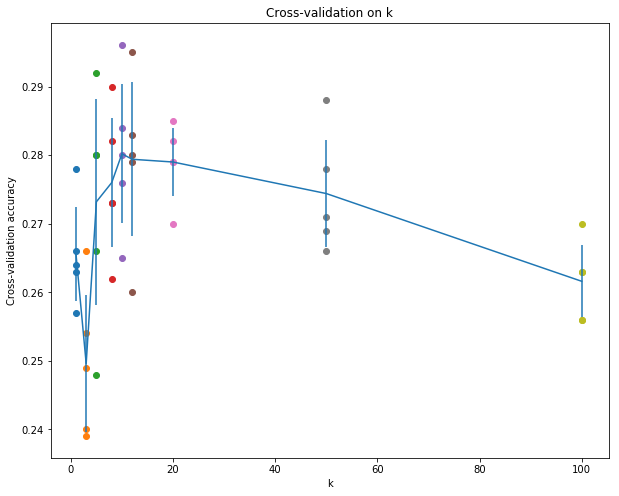

In [17]:
# plot the raw observations
plt.figure()
for k in k_choices:
    accuracies = k_to_accuracies[k]
    plt.scatter([k] * len(accuracies), accuracies)

# plot the trend line with error bars that correspond to standard deviation
accuracies_mean = np.array([np.mean(v) for k, v in sorted(k_to_accuracies.items())])
accuracies_std  = np.array([np.std(v) for k, v in sorted(k_to_accuracies.items())])
plt.errorbar(k_choices, accuracies_mean, yerr=accuracies_std)
plt.title('Cross-validation on k')
plt.xlabel('k')
plt.ylabel('Cross-validation accuracy')
plt.show()

In [18]:
# Based on the cross-validation results above, choose the best value for k,   
# retrain the classifier using all the training data, and test it on the test
# data.
best_k = 6

classifier = KNearestNeighbor()
classifier.train(X_train, y_train)
y_test_pred = classifier.predict(X_test, k=best_k)

# Compute and display the accuracy
num_correct = np.sum(y_test_pred == y_test)
accuracy = float(num_correct) / num_test
print('Got %d / %d correct => accuracy: %f' % (num_correct, num_test, accuracy))

Got 527 / 2000 correct => accuracy: 0.263500
